In [1]:
import numpy as np
import mesa
from model import HumanitarianLogistics, COA, AZC, Newcomer
import activity
from Values import Values
import matplotlib.pyplot as plt

In [2]:
#initial config
width = 200
height = 200
num_pols = 2
city_size = 20
number_steps = 150


In [3]:
#helper functions
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq: http://www.statsdirect.com/help/content/image/stat0206_wmf.gif
    # from: http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    array = array.flatten() #all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient

/home/phillip/anaconda3/envs/port/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/phillip/anaconda3/envs/port/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


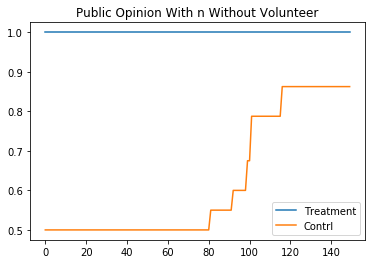

In [3]:
test = HumanitarianLogistics(width, height, num_pols, city_size)
#remove consolidate action


treatment = [azc for azc in test.schedule.agents if
       type(azc) is AZC and azc.modality == 'AZC' and
       azc.city.ngo != None]
control = [azc for azc in test.schedule.agents if
       type(azc) is AZC and azc.modality == 'AZC' and
       azc.city.ngo == None]

data = np.zeros(shape = (number_steps, 2))

   
for x in range(0,20):
    test.step()

for step in range(0,number_steps):
    test.step()
    
    trt = []
    cntrl = []
    for x in treatment:
        trt.append(x.city.public_opinion)
        
    for y in control:
        cntrl.append(y.city.public_opinion)
    

    data[step, 0] = np.mean(trt)
    data[step, 1] = np.mean(cntrl)
    

plt.plot(data)
plt.legend(['Treatment', 'Contrl'])
plt.title('Public Opinion With n Without Volunteer')
plt.show()



        


In [4]:
for x in control:
    print(x.city.ngo)
    print(x.activity_center.counter)

None
{'languageClass': 5243, 'Work': 1040, 'Doctor': 162}
None
{'languageClass': 5243, 'Work': 1040, 'Doctor': 162}
None
{'Work': 2500, 'languageClass': 9286, 'Doctor': 184}
None
{'Work': 2500, 'languageClass': 9286, 'Doctor': 184}
None
{'languageClass': 11626, 'Work': 3633, 'Doctor': 196}
None
{'languageClass': 11626, 'Work': 3633, 'Doctor': 196}
None
{'Work': 7168, 'languageClass': 3052, 'Doctor': 211}
None
{'Work': 7168, 'languageClass': 3052, 'Doctor': 211}
None
{'languageClass': 9327, 'Doctor': 164, 'Work': 2391}
None
{'languageClass': 9327, 'Doctor': 164, 'Work': 2391}


## Action: Football (NGO presence at all)
## Metric: NC Health

/home/phillip/anaconda3/envs/port/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/phillip/anaconda3/envs/port/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


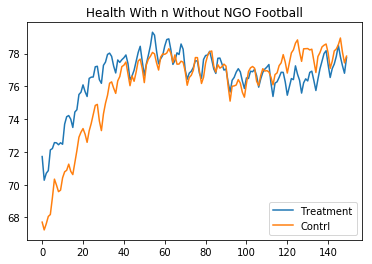

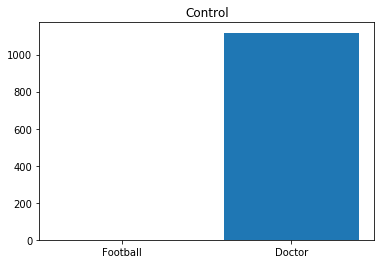

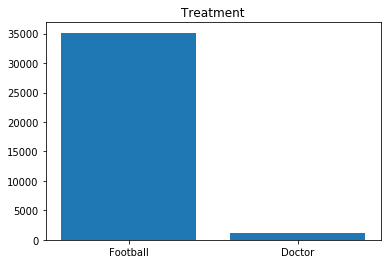

In [4]:
test = HumanitarianLogistics(width, height, num_pols, city_size)
#remove consolidate action


treatment = [azc for azc in test.schedule.agents if
       type(azc) is AZC and azc.modality == 'AZC' and
       azc.city.ngo != None]
control = [azc for azc in test.schedule.agents if
       type(azc) is AZC and azc.modality == 'AZC' and
       azc.city.ngo == None]

data = np.zeros(shape = (number_steps, 2))

   
for x in range(0,20):
    test.step()

for step in range(0,number_steps):
    test.step()
    
    trt = []
    cntrl = []
    for x in treatment:
        trt.append(np.mean([nc.health for nc in x.occupants]))
        
    for y in control:
        cntrl.append(np.mean([nc.health for nc in y.occupants]))
    

    data[step, 0] = np.mean(trt)
    data[step, 1] = np.mean(cntrl)
    

plt.plot(data)
plt.legend(['Treatment', 'Contrl'])
plt.title('Health With n Without NGO Football')
plt.show()

out = {'Football': 0, 'Doctor': 0}
outt = {'Football': 0, 'Doctor': 0}

for x in ['Football', 'Doctor']:
    for z in treatment:
        outt[x] += z.city.azc.activity_center.counter[x]
for y in control:
        out['Doctor'] += y.city.azc.activity_center.counter['Doctor']
        
plt.bar(range(len(out)), list(out.values()))
plt.xticks(range(len(out)), list(out.keys()))
plt.title('Control')
plt.show()

plt.bar(range(len(outt)), list(outt.values()), align='center')
plt.xticks(range(len(outt)), list(outt.keys()))
plt.title('Treatment')
plt.show()


In [5]:
for y in control:
    print(y.activity_center.counter)

{'Work': 7828, 'languageClass': 6159, 'Football': 6034, 'Doctor': 177}
{'Work': 7828, 'languageClass': 6159, 'Football': 6034, 'Doctor': 177}
{'Work': 7172, 'languageClass': 7019, 'Football': 5803, 'Doctor': 193}
{'Work': 7172, 'languageClass': 7019, 'Football': 5803, 'Doctor': 193}
{'Work': 7294, 'languageClass': 6634, 'Football': 5750, 'Doctor': 189}
{'Work': 7294, 'languageClass': 6634, 'Football': 5750, 'Doctor': 189}


## Action:Doctor
## Metric: NC health

/home/phillip/anaconda3/envs/port/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/phillip/anaconda3/envs/port/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


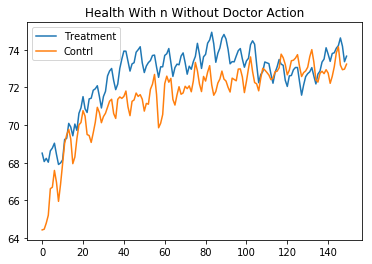

In [6]:
test = HumanitarianLogistics(width, height, num_pols, city_size)
#remove consolidate action

treatment = [azc for azc in test.schedule.agents if
       type(azc) is AZC and
       azc.unique_id % 2 == 0]
control = [azc for azc in test.schedule.agents if
       type(azc) is AZC and
       azc.unique_id % 2 == 1]

data = np.zeros(shape = (number_steps, 2))
for x in treatment:
    aa = set([])
    for act in x.activity_center.activities_available:
        if type(act) is not activity.Doctor:
            aa.add(act)
    x.activity_center.activities_available = aa
   
for x in range(0,20):
    test.step()

for step in range(0,number_steps):
    test.step()
    
    trt = []
    cntrl = []
    for x in treatment:
        trt.append(np.mean([nc.health for nc in x.occupants]))
        
    for y in control:
        cntrl.append(np.mean([nc.health for nc in y.occupants]))
    

    data[step, 0] = np.mean(trt)
    data[step, 1] = np.mean(cntrl)

plt.plot(data)
plt.legend(['Treatment', 'Contrl'])
plt.title('Health With n Without Doctor Action')
plt.show()

In [7]:
test = HumanitarianLogistics(width, height, num_pols, city_size)
data = np.zeros(shape = (number_steps, 2))

#treatment
treatment = [azc.coa for azc in test.schedule.agents if
       type(azc) is AZC and azc.modality == 'AZC' and
       azc.unique_id % 2 == False]

for x in treatment:
    x.activity_

#control
control = [azc.coa for azc in test.schedule.agents if
       type(azc) is AZC and azc.modality == 'AZC' and
       azc.unique_id % 2 == True]

for x in control:
    x.self_enhancement = 50
    x.self_transcendence = 50  
    x.conservatism = 50
    x.openness_to_change = 50
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)
    
    x.assessment_frequency = int(365/(x.openness_to_change*52/100))
    x.action_frequency = x.assessment_frequency
    x.staff = x.self_transcendence
    x.checkin_frequency =  int(365/(x.staff*52/100))
    
data = np.zeros(shape = (number_steps, 2))

AttributeError: 'COA' object has no attribute 'activity_'

## Action Issue Statement
## Metric: # of Unlikely Newcomers

In [ ]:
test = HumanitarianLogistics(width, height, num_pols, city_size)

#treatment
treatment = [azc.city.ind for azc in test.schedule.agents if
            type(azc) is AZC and azc.modality == 'POL']

data = np.zeros(shape = (number_steps, 2))
for x in treatment:
    x.self_enhancement = 70
    x.self_transcendence = 50    
    x.conservatism = 50
    x.openness_to_change = 50
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)


    
for step in range(0,number_steps):
    test.step()

    data[step,0] = np.sum([nc.second for nc in test.schedule.agents if
                          type(nc) is Newcomer])
        
    

names = ['issueStatement', 'lowerThreshold', 'raiseThreshold', 'adjustStaff']

hist = {name:0 for name in names}

for c in treatment:
    for name in names:
        for act in c.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Treatment Action Histogram')
plt.show()
    
    
#init new model    
testc = HumanitarianLogistics(width, height, num_pols, city_size) 
testc.dq = True
#control
control = [azc.city.ind for azc in testc.schedule.agents if
            type(azc) is AZC and azc.modality == 'POL']

for x in control:
    x.self_enhancement = 50
    x.self_transcendence = 55
    x.conservatism = 55
    x.openness_to_change = 45
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)
    
    
for step in range(0,number_steps):
    testc.step()
    data[step,1] = np.sum([nc.second for nc in testc.schedule.agents if
                          type(nc) is Newcomer])
    
names = ['issueStatement', 'lowerThreshold', 'raiseThreshold', 'adjustStaff']
hist = {name:0 for name in names}


for c in control:
    for name in names:
        for act in c.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Control Action Histogram')
plt.show()

plt.plot(data)
plt.title('Number of low likelihood Newcomers')
plt.legend(['Treatment', 'Control'])    
plt.show()




    
    


In [ ]:
for c in treatment:
    for act in c.actions:
        print(act.name, act.counter)

## Action: Adjust Staff
## Metric: Staff size
High OTC IND's should adjust staff in accordance with the flow of the incoming newcomers

In [ ]:
test = HumanitarianLogistics(width, height, num_pols, city_size)

#treatment
treatment = [azc.city.ind for azc in test.schedule.agents if
            type(azc) is AZC and azc.modality == 'POL']

data = np.zeros(shape = (number_steps, 2))
for x in treatment:
    x.self_enhancement = 50
    x.self_transcendence = 40    
    x.conservatism = 60
    x.openness_to_change = 80
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)


    
for step in range(0,number_steps):
    test.step()

    data[step,0] = np.mean([ind.staff for ind in
                            treatment])
        
    

names = ['issueStatement', 'lowerThreshold', 'raiseThreshold', 'adjustStaff']

hist = {name:0 for name in names}

for c in treatment:
    for name in names:
        for act in c.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Treatment Action Histogram')
plt.show()
    
    
#init new model    
testc = HumanitarianLogistics(width, height, num_pols, city_size) 
testc.dq = True
#control
control = [azc.city.ind for azc in testc.schedule.agents if
            type(azc) is AZC and azc.modality == 'POL']

for x in control:
    x.self_enhancement = 50
    x.self_transcendence = 70  
    x.conservatism = 60
    x.openness_to_change = 40
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)
    
    
for step in range(0,number_steps):
    testc.step()
    data[step,1] = np.mean([ind.staff for ind in
                            control])
    
names = ['issueStatement', 'lowerThreshold', 'raiseThreshold', 'adjustStaff']
hist = {name:0 for name in names}


for c in control:
    for name in names:
        for act in c.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Control Action Histogram')
plt.show()

plt.plot(data)
plt.title('IND Average Staff size over time')
plt.legend(['Treatment', 'Control'])    
plt.show()




    
    


In [ ]:
for c in control:
    for a in c.actions:
        print(a.name, a.counter)

## Action: Lower Threshold
## Metric: Number of FP and FN
We expectt o see a lower threshold result in an increase in FP and a decrease in FN

In [ ]:
test = HumanitarianLogistics(width, height, num_pols, city_size)

#treatment
treatment = [azc.city.ind for azc in test.schedule.agents if
            type(azc) is AZC]

fp_data = np.zeros(shape = (number_steps, 2))
fn_data = np.zeros(shape = (number_steps, 2))
for x in treatment:
    x.self_enhancement = 50
    x.self_transcendence = 70    
    x.conservatism = 50
    x.openness_to_change = 50
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)


    
for step in range(0,number_steps):
    test.step()

    
    fp_data[step,0] = np.array([test.confusionMatrix['FP']])
    fn_data[step,0] = np.array([test.confusionMatrix['FN']])
        

names = ['issueStatement', 'lowerThreshold', 'raiseThreshold', 'adjustStaff']

hist = {name:0 for name in names}

for c in treatment:
    for name in names:
        for act in c.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Treatment Action Histogram')
plt.show()
    
    
#init new model    
testc = HumanitarianLogistics(width, height, num_pols, city_size) 
testc.dq = True
#control
control = [azc.city.ind for azc in testc.schedule.agents if
            type(azc) is AZC]

for x in control:
    x.self_enhancement = 50
    x.self_transcendence = 50  
    x.conservatism = 50
    x.openness_to_change = 50
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)
    
    
for step in range(0,number_steps):
    testc.step()

    
    fp_data[step,1] = np.array([testc.confusionMatrix['FP']])
    fn_data[step,1] = np.array([testc.confusionMatrix['FN']])
    
names = ['issueStatement', 'lowerThreshold', 'raiseThreshold', 'adjustStaff']
hist = {name:0 for name in names}


for c in control:
    for name in names:
        for act in c.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Control Action Histogram')
plt.show()

plt.plot(fn_data)
plt.title('FN')
plt.legend(['Treatment', 'Control'])    
plt.show()

plt.plot(fp_data)
plt.title('FP')
plt.legend(['Treatment', 'Control'])    
plt.show()



    
    


## Action: Raise Threshold
## Metric: number of FP and FN
We expect to see a higher threshold result in an increase of FN and a decrease in FP compared to controls. 


In [ ]:
test = HumanitarianLogistics(width, height, num_pols, city_size)

#treatment
treatment = [azc.city.ind for azc in test.schedule.agents if
            type(azc) is AZC]

fp_data = np.zeros(shape = (number_steps, 2))
fn_data = np.zeros(shape = (number_steps, 2))
for x in treatment:
    x.self_enhancement = 50
    x.self_transcendence = 50    
    x.conservatism = 70
    x.openness_to_change = 50
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)


    
for step in range(0,number_steps):
    test.step()

    
    fp_data[step,0] = np.array([test.confusionMatrix['FP']])
    fn_data[step,0] = np.array([test.confusionMatrix['FN']])
        
    
    data[step,0] = gini(np.array(treatment_data,dtype='float'))

names = ['issueStatement', 'lowerThreshold', 'raiseThreshold', 'adjustStaff']

hist = {name:0 for name in names}

for c in treatment:
    for name in names:
        for act in c.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Treatment Action Histogram')
plt.show()
    
    
#init new model    
testc = HumanitarianLogistics(width, height, num_pols, city_size) 
testc.dq = True
#control
control = [azc.city.ind for azc in testc.schedule.agents if
            type(azc) is AZC]

for x in control:
    x.self_enhancement = 50
    x.self_transcendence = 50  
    x.conservatism = 50
    x.openness_to_change = 50
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)
    
    
for step in range(0,number_steps):
    testc.step()

    
    fp_data[step,1] = np.array([testc.confusionMatrix['FP']])
    fn_data[step,1] = np.array([testc.confusionMatrix['FN']])
    
names = ['issueStatement', 'lowerThreshold', 'raiseThreshold', 'adjustStaff']
hist = {name:0 for name in names}


for c in control:
    for name in names:
        for act in c.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Control Action Histogram')
plt.show()

plt.plot(fn_data)
plt.title('FN')
plt.legend(['Treatment', 'Control'])    
plt.show()

plt.plot(fp_data)
plt.title('FP')
plt.legend(['Treatment', 'Control'])    
plt.show()



    
    


In [ ]:
plt.plot(fn_data)
plt.title('FN')
plt.legend(['Treatment', 'Control'])    
plt.show()

plt.plot(fp_data)
plt.title('FP')
plt.legend(['Treatment', 'Control'])    
plt.show()



## Action: Consolidate
## Metric: Occupancy Concrentration accross AZCs
#### Reasoning
Concentrating newcomers in fewer facilities costs less in maitenance. Freeing up resources for other purposes. 

In [ ]:
test = HumanitarianLogistics(width, height, num_pols, city_size)

#treatment
treatment = [azc.coa for azc in test.schedule.agents if
       type(azc) is AZC and azc.modality == 'AZC']

data = np.zeros(shape = (number_steps, 2))
for x in treatment:
    x.self_enhancement = 80
    x.self_transcendence = 50    
    x.conservatism = 50
    x.openness_to_change = 50
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)
    x.assessment_frequency = int(365/(x.openness_to_change*52/100))
    x.action_frequency = x.assessment_frequency
    x.staff = x.self_transcendence
    x.checkin_frequency =  int(365/(x.staff*52/100))
    x.action_frequency = x.assessment_frequency

    
for step in range(0,number_steps):
    test.step()
    treatment_data = []
    for coa in treatment:
        for azc in coa.city.azcs:
            treatment_data.append(azc.occupancy)
        
        
    
    data[step,0] = gini(np.array(treatment_data,dtype='float'))

names = ['Consolidate', 'Invest', 'Segregate', 'Integrate']

hist = {name:0 for name in names}

for c in treatment:
    for name in names:
        for act in c.city.coa.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Treatment Action Histogram')
plt.show()
    
    
#init new model    
testc = HumanitarianLogistics(width, height, num_pols, city_size)    
#control
control = [azc.coa for azc in testc.schedule.agents if
       type(azc) is AZC and azc.modality == 'AZC']

for x in control:
    x.self_enhancement = 40
    x.self_transcendence = 50  
    x.conservatism = 50
    x.openness_to_change = 50
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)
    x.assessment_frequency = int(365/(x.openness_to_change*52/100))
    x.action_frequency = x.assessment_frequency
    x.staff = x.self_transcendence
    x.checkin_frequency =  int(365/(x.staff*52/100))
    x.action_frequency = x.assessment_frequency
    print(x.checkin_frequency)
    
for step in range(0,number_steps):
    testc.step()
    control_data = []
    for coa in control:
        for azc in coa.city.azcs:
            control_data.append(azc.occupancy)
  
    
    data[step,1] = gini(np.array(control_data, dtype = 'float'))
    
names = ['Consolidate', 'Invest', 'Segregate', 'Integrate']
hist = {name:0 for name in names}


for c in control:
    for name in names:
        for act in c.city.coa.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Control Action Histogram')
plt.show()
    
    
    


In [ ]:
plt.plot(data)
plt.legend(['Treatment', 'Control'])
plt.title('AZC Occupancy Gini Over Time')
plt.show()
names = ['Consolidate', 'Invest', 'Segregate', 'Integrate']
hist = {name:0 for name in names}


for c in control:
    for name in names:
        for act in c.city.coa.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Control Action Histogram')
plt.show()

hist = {name:0 for name in names}

for c in treatment:
    for name in names:
        for act in c.city.coa.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Treatment Action Histogram')
plt.show()

## Action: Invest
## Metric: Avg Newcomer Health

In [ ]:
#treatment
treatment = [azc.coa for azc in test.schedule.agents if
       type(azc) is AZC and azc.modality == 'AZC' and
       azc.unique_id % 2 == False]

for x in treatment:
    x.self_enhancement = 50
    x.self_transcendence = 80  
    x.conservatism = 50
    x.openness_to_change = 50
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)
    x.assessment_frequency = int(365/(x.openness_to_change*52/100))
    x.action_frequency = x.assessment_frequency
    x.staff = x.self_transcendence
    x.checkin_frequency =  int(365/(x.staff*52/100))

#control
control = [azc.coa for azc in test.schedule.agents if
       type(azc) is AZC and azc.modality == 'AZC' and
       azc.unique_id % 2 == True]

for x in control:
    x.self_enhancement = 50
    x.self_transcendence = 50  
    x.conservatism = 50
    x.openness_to_change = 50
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)
    
    x.assessment_frequency = int(365/(x.openness_to_change*52/100))
    x.action_frequency = x.assessment_frequency
    x.staff = x.self_transcendence
    x.checkin_frequency =  int(365/(x.staff*52/100))
    
data = np.zeros(shape = (number_steps, 2))

In [ ]:
for step in range(0,number_steps):
    test.step()
    treatment_data = []
    for azc in treatment:
        for newcomer in azc.city.azc.occupants:
            treatment_data.append(newcomer.values.health)
    control_data = []
    for azc in control:
        for newcomer in azc.city.azc.occupants:
            control_data.append(newcomer.values.health)
    data[step,0] = np.mean(treatment_data)
    data[step,1] = np.mean(control_data)
    
    

In [ ]:
plt.plot(data[150:250,:])
plt.legend(['Treatment', 'Control'])
plt.title('Newcomer Health Over Time')
plt.show()
names = ['Consolidate', 'Invest', 'Segregate', 'Integrate']
hist = {name:0 for name in names}


for c in control:
    for name in names:
        for act in c.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Control Action Histogram')
plt.show()

hist = {name:0 for name in names}

for c in treatment:
    for name in names:
        for act in c.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Treatment Action Histogram')
plt.show()

In [ ]:
7 % 0
